In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

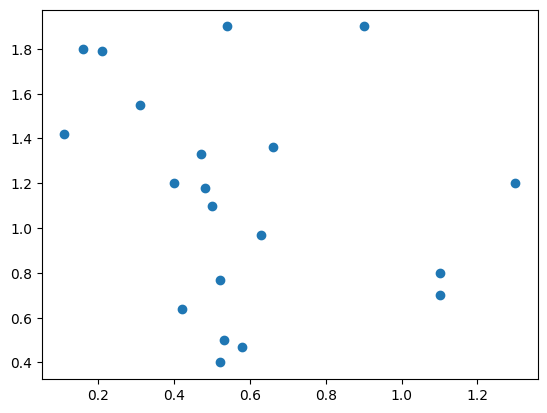

In [114]:
csv_file_path = "https://raw.githubusercontent.com/Ubinquitous/NPL-ratio-based-on-return-on-total-assets/main/2004%E1%84%82%E1%85%A7%E1%86%AB%E1%84%87%E1%85%AE%E1%84%90%E1%85%A52023%E1%84%82%E1%85%A7%E1%86%AB%E1%84%81%E1%85%A1%E1%84%8C%E1%85%B5%E1%84%8B%E1%85%B4%E1%84%8E%E1%85%A9%E1%86%BC%E1%84%8C%E1%85%A1%E1%84%89%E1%85%A1%E1%86%AB%E1%84%8B%E1%85%B5%E1%84%8B%E1%85%B5%E1%86%A8%E1%84%8B%E1%85%B2%E1%86%AF%E1%84%80%E1%85%AA%E1%84%80%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%BC%E1%84%8B%E1%85%B5%E1%84%92%E1%85%A1%E1%84%8B%E1%85%A7%E1%84%89%E1%85%B5%E1%86%AB%E1%84%87%E1%85%B5%E1%84%8B%E1%85%B2%E1%86%AF.csv"
df = pd.read_csv(csv_file_path)
X = df['총자산이익율']
Y = df['고정이하여신비율']
plt.scatter(x=X, y=Y)
plt.show()

In [115]:
def loss(x,y,beta_0, beta_1):
    ms=np.sum((y - (beta_0 * x + beta_1))**2)
    Loss=ms/len(x)
    return Loss


beta_0:-0.40
beta_1:1.38
Loss :0.21



<ipython-input-116-0ac2db420cae>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("beta_0:%.2f"%beta_0)
<ipython-input-116-0ac2db420cae>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("beta_1:%.2f"%beta_1)


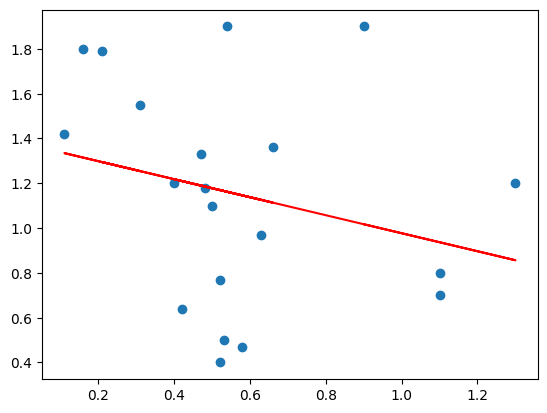

In [116]:
train_X=X.values.reshape(-1,1)
train_Y=Y.values.reshape(-1,1)
lrmodel=LinearRegression()
lrmodel.fit(train_X, train_Y)
beta_0=lrmodel.coef_[0]
beta_1=lrmodel.intercept_

plt.scatter(X, Y)
predict=lrmodel.predict(train_X)
plt.plot(train_X,predict,'r')

print()
print("beta_0:%.2f"%beta_0)
print("beta_1:%.2f"%beta_1)
print("Loss :%.2f"%loss(X,Y,beta_0,beta_1))
print()

In [128]:
lrmodel = LinearRegression()
lrmodel.fit(X.values.reshape(-1, 1), Y.values.reshape(-1, 1))

beta_0 = lrmodel.coef_[0][0]
beta_1 = lrmodel.intercept_[0]

def predict(예상고정이하여신비율, beta_0, beta_1):
    value = float(예상고정이하여신비율)
    return value * beta_0 + beta_1

예상고정이하여신비율 = input('고정이하여신비율을 입력해주세요: ')
predict_value = predict(예상고정이하여신비율, beta_0, beta_1)
print("예상되는 순수익: %.2f" % predict_value)

고정이하여신비율을 입력해주세요: 1.3
예상되는 순수익: 0.86


In [135]:
lrmodel = LinearRegression()
lrmodel.fit(X.values.reshape(-1, 1), Y.values.reshape(-1, 1))

beta_0 = lrmodel.coef_[0][0]
beta_1 = lrmodel.intercept_[0]

def expected_sales(예상고정이하여신비율, beta_0, beta_1):
    value = float(예상고정이하여신비율)
    sales = value * beta_0 + beta_1
    return sales

예상고정이하여신비율 = input('고정이하여신비율을 입력해주세요: ')
expected_sales_value = expected_sales(예상고정이하여신비율, beta_0, beta_1)
print("예상되는 판매량: %.2f" % expected_sales_value)

y_pred = lrmodel.predict(X.values.reshape(-1, 1))
mse = mean_squared_error(Y, y_pred)
r_squared = r2_score(Y, y_pred)

print("MSE : %.2f" % mse)
print("결정계수 : %.2f" % r_squared)

고정이하여신비율을 입력해주세요: 0.2
예상되는 판매량: 1.30
MSE : 0.21
결정계수 : 0.07


In [133]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X.values.reshape(-1, 1))

lr_model = LinearRegression()
lr_model.fit(X_poly, Y)

y_pred = lr_model.predict(X_poly)
mse = mean_squared_error(Y, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.18561587887503606
